# Step 1: Reading and Understanding the Data

### 1.1 > Import important Libraries to analyze data set

In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1.2 > Reading the day.csv file and keeping the header row intact
##### Executed head() command to get initial look and feel of data

In [506]:
day=pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [507]:
#lets find the column names
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [508]:
#Finding the shape of data sets.
day.shape

(730, 16)

# Step 2: Data Cleaning

### 2.1 > Null checking
##### Lets see if there are some columns with nulls accross. If yes, we will drop them

In [511]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### --> No nulls found across full column

### 2.2 > Datatype check

In [514]:
# Lets check the column datatypes
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [515]:
# Convert dteday to date datatype
day['dteday']=pd.to_datetime(day['dteday'],format='%d-%m-%Y')


In [516]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [517]:
#let's describe the dataset
day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


### 2.3 > Data Cleaning

##### As per problem statement model should be built on 'cnt' which indicates the total number of bike rentals including both 'casual' and 'registered'. 
##### Column 'instant' is just an index to the dataset, it has no significance in model building.
##### so, we don't need columns 'instant', 'casual' and 'registered'. Lets drop them.


In [519]:
day.drop(["instant","casual","registered"],axis = 1, inplace = True)

In [520]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 2.4 > Removal of duplicate rows

In [522]:
day=day.drop_duplicates()
day.shape

## There are no duplicates found in rows.

(730, 13)

# Step 3: Visualising the Data

Let's visualise our data using matplotlib and seaborn.

In [524]:
day.head(20)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,2018-01-06,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,2018-01-07,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,2018-01-08,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,2018-01-09,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,2018-01-10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


## Outlier check for numeical columns

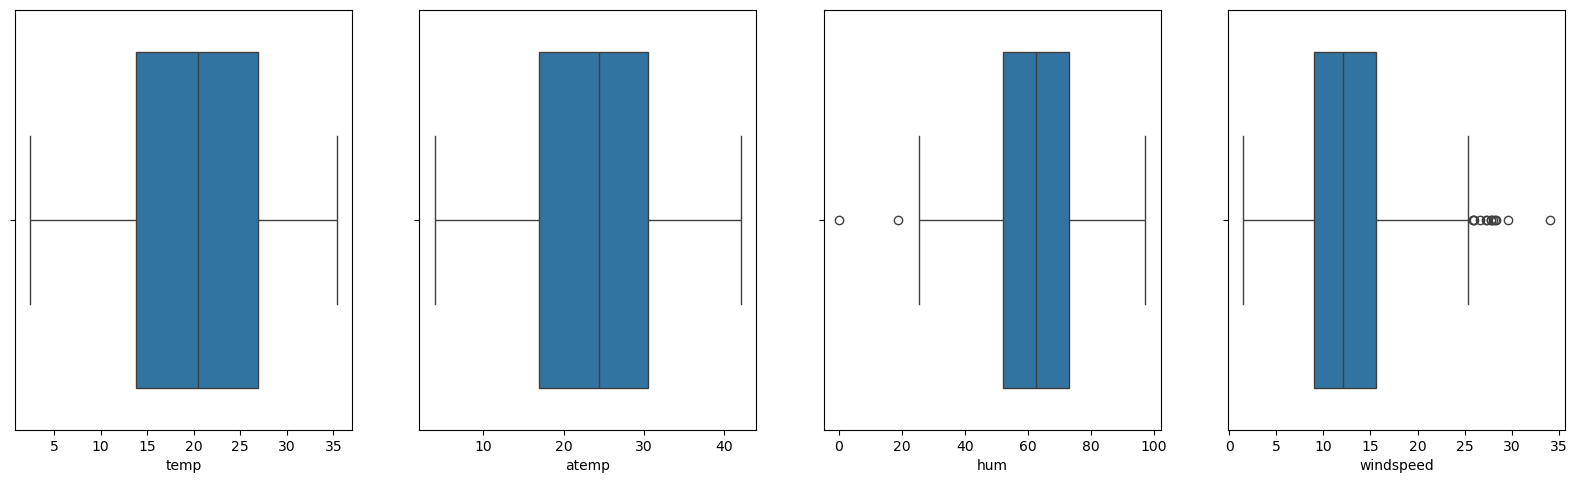

In [526]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='temp', data=day)
plt.subplot(2, 4, 2)
sns.boxplot(x='atemp', data=day)
plt.subplot(2, 4, 3)
sns.boxplot(x='hum', data=day)
plt.subplot(2, 4, 4)
sns.boxplot(x='windspeed', data=day)
plt.show()

#### *Inference*
- There are no significant outliers. Lets analyse the data further.
-------------

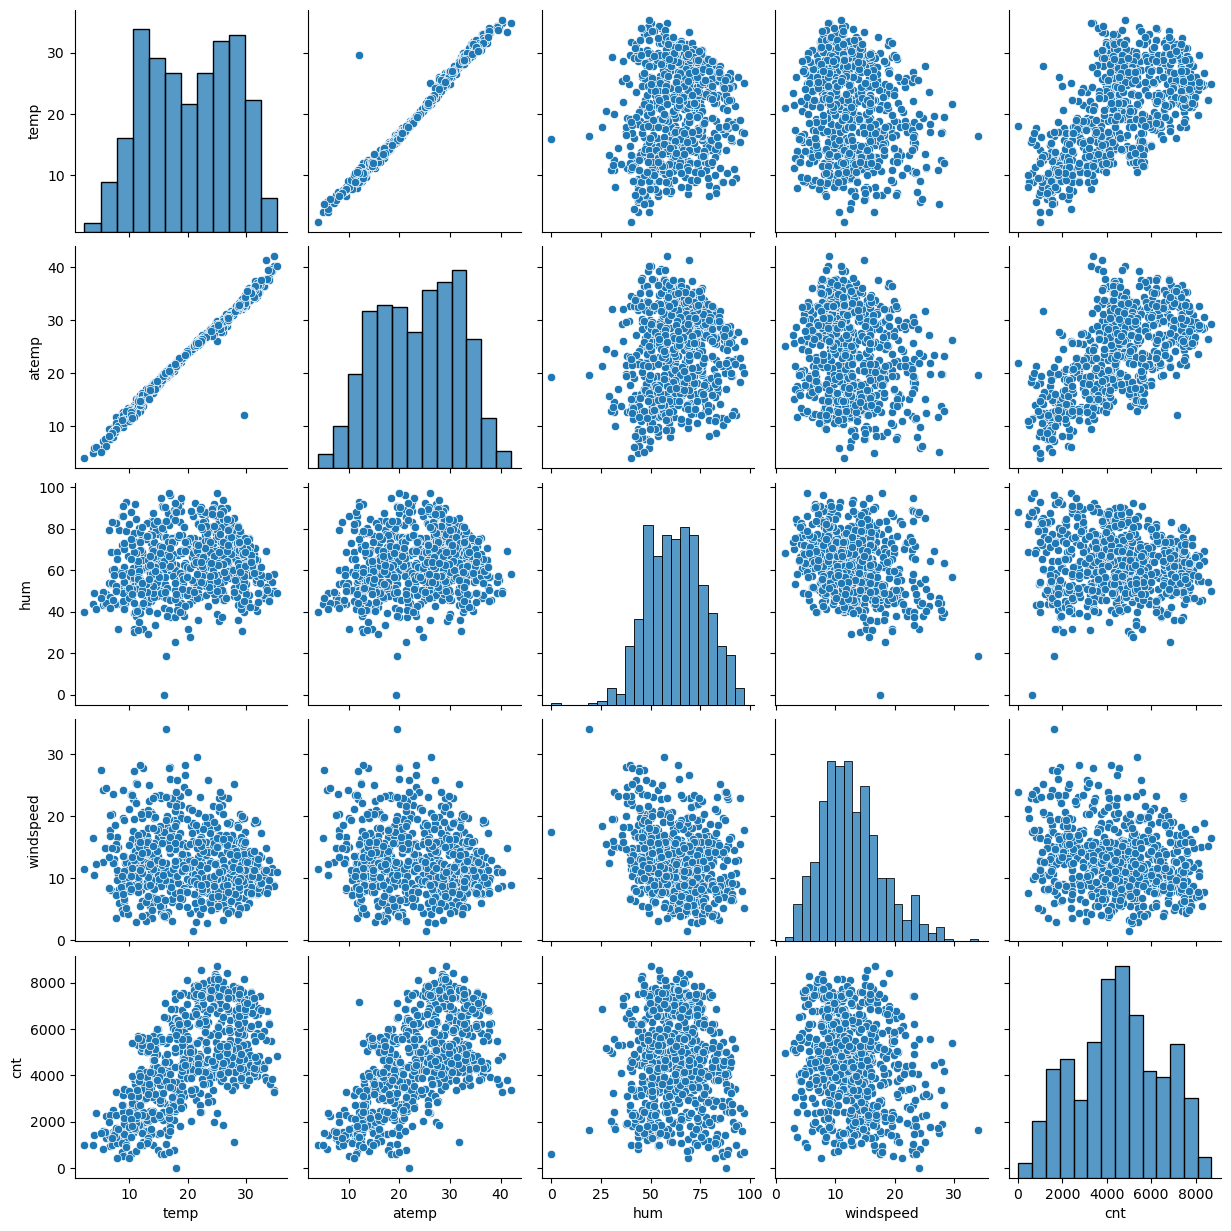

In [528]:
#Using Pair plot , Let's Visualize the numerical data
sns.pairplot(data=day, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### *Inference*
- There is a strong positive linear relationship between 'temp' and 'atemp', which means they increase together.
  We have to exclude one of them to avoid multi collinearity.
   
- 'hum' (humidity) and 'windspeed' do not show a clear relationship with 'cnt'
<br><br><br>Let's explore these correlations with different variables further.
-------------

In [530]:
# It is clearly visible in ablove plot that 'temp' and 'atemp' are havig a very strong corelation. lets drop column 'atemp' to avoid the problem of collinearity
day.drop(['atemp'],axis = 1, inplace = True)

##### we have following columns which are categorical in nature. 
* 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit'

* As per data dictionary below columns have binary values (0 or 1) <br>
 'yr', 'holiday','workingday' <br>
* and others have non binary numerical values (0 to n) <br>
'season', 'mnth', 'weekday', 'weathersit' <br>



In [532]:
# Lets map them with values in order to better visualize them for our analysis

day['season']=day.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
day['yr']=day.yr.map({0: 2018, 1: 2019 })
day['mnth']=day.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day['holiday']=day.holiday.map({0: 'Non-Holiday', 1: 'Holiday' })
day['weekday']=day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
day['workingday']=day.workingday.map({0: 'Non-Workingday', 1: 'Workingday' })
day['weathersit']=day.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Rain',4:'Heavy Rain'})

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2018-01-01,spring,2018,Jan,Non-Holiday,Sat,Non-Workingday,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,2018-01-02,spring,2018,Jan,Non-Holiday,Sun,Non-Workingday,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,2018-01-03,spring,2018,Jan,Non-Holiday,Mon,Workingday,Clear,8.050924,43.7273,16.636703,1349
3,2018-01-04,spring,2018,Jan,Non-Holiday,Tue,Workingday,Clear,8.200000,59.0435,10.739832,1562
4,2018-01-05,spring,2018,Jan,Non-Holiday,Wed,Workingday,Clear,9.305237,43.6957,12.522300,1600


##### Let's check the relationship of these categorical valiables with 'cnt'.
we are using subplots to see them together.

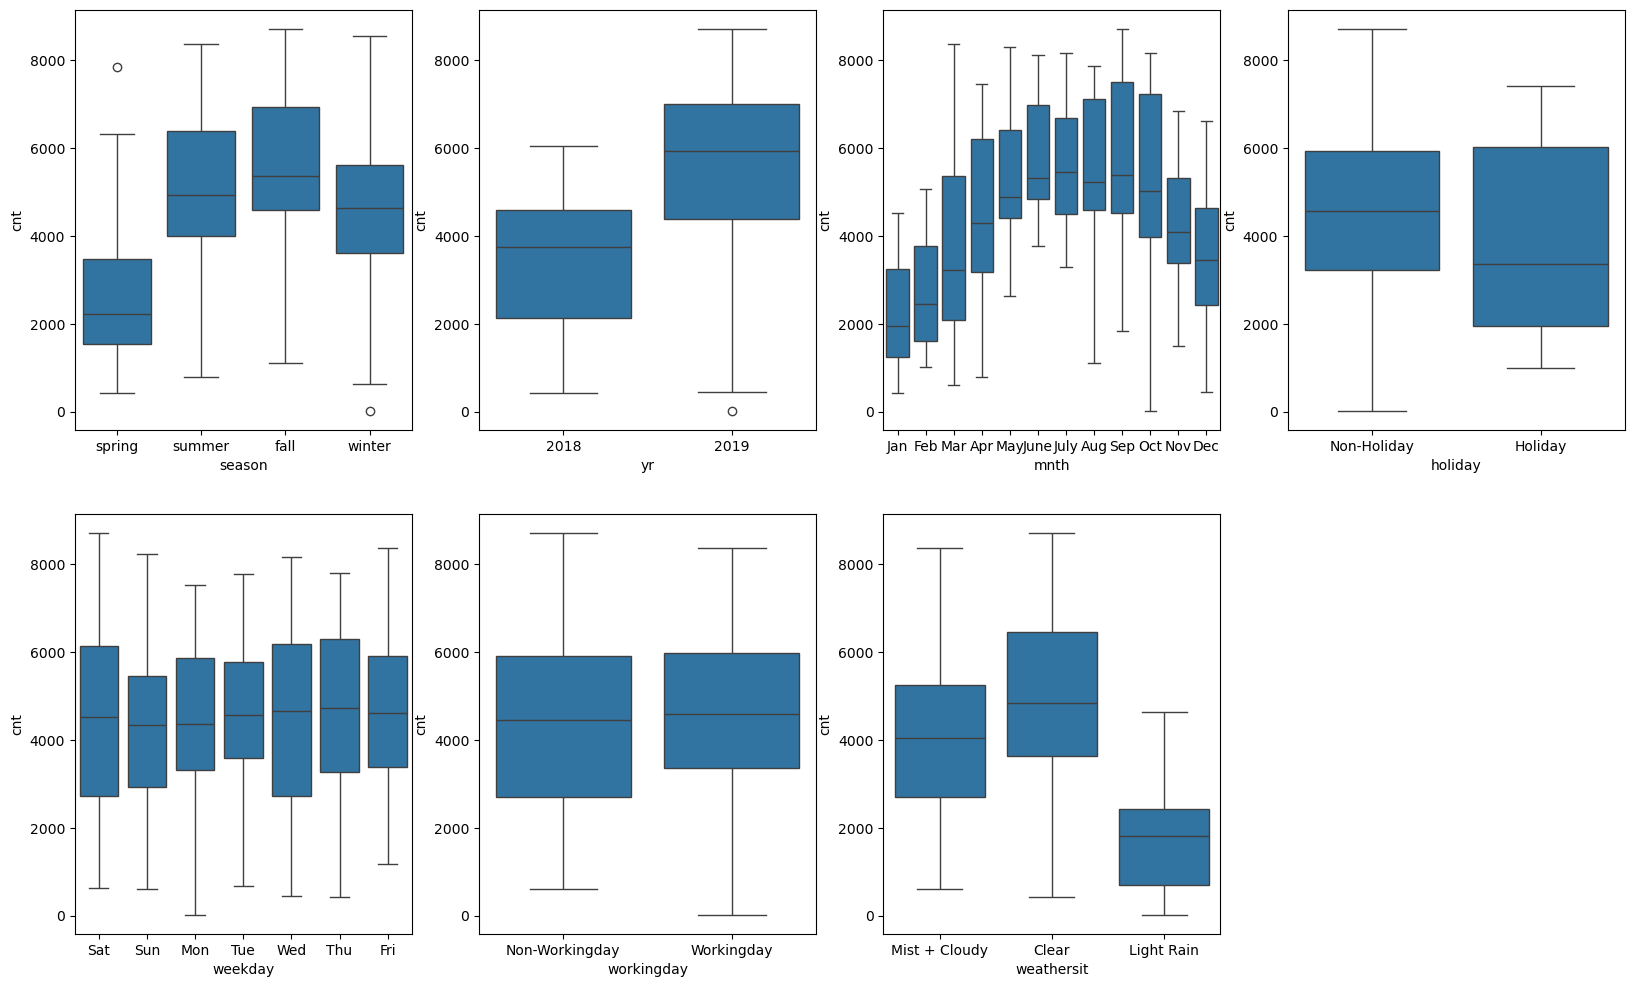

In [534]:
#Univariate
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=day)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=day)
plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=day)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=day)
plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=day)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=day)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=day)
plt.show()



#### *Inference*
- Season (Plot-1): Bike counts are shown for four seasons: spring, summer, fall, and winter. Higher median counts are seen in summer and fall compared to spring and winter.
- Year (Plot-2): Comparison of bike counts between the years 2018 and 2019, showing a higher median count in 2019.
- Month (Plot-3): Bike counts for each month, from January to December. Counts generally increase from January to July, peak around August, and then decrease towards December.
- Holiday (Plot-4): Comparison of bike counts between non-holidays and holidays, with slightly higher median counts on holidays.
- Weekday (Plot-5): Bike counts for each day of the week, showing relatively consistent counts with slight variations.
- Working Day (Plot-6): Comparison of bike counts between non-working days and working days, with higher median counts on working days.
- Weather Situation (Plot-7): Bike counts for different weather conditions: Mist + Cloudy, Clear, and Light Rain. Clear weather has the highest median counts, while Light Rain has the lowest. Also, there is no data for Heavy Rain. It means bikes are not rented on days when there is heavy rain.

-------------

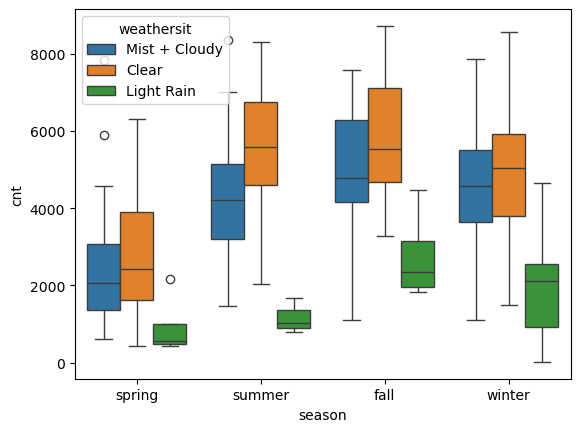

In [536]:
#Bivariate analysis
sns.boxplot(x='season', y='cnt',hue='weathersit', data=day)
plt.show()

#### *Inference*
- Seasonal Variation: The plot shows how bike counts vary across different seasons, with higher counts generally observed in summer and fall compared to spring and winter.
Weather Impact: The color-coded box plots indicate the impact of weather conditions on bike counts. Clear weather (orange) typically has higher median bike counts, while Light Rain (green) has the lowest.

### Derived Metrics: 
##### we are going to find the day of the year from the date columns so that we can get more presize data on rental on date distribution

In [539]:
day['day_of_year']=day['dteday'].dt.dayofyear


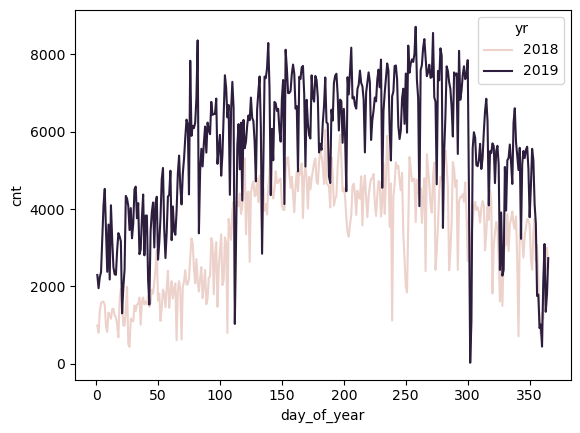

In [540]:
#Let's plot the distribution between day of the year and rental count
sns.lineplot(data=day,x='day_of_year',y='cnt',hue='yr')
plt.show()

#### *Inference*
- We can see that rentals are higher during the mid of the year as compared to beginning and end
-------------

In [542]:
#We can drop dteday, since all the data which can be derived from that column is already available as part of other columns.
day.drop(['dteday'],axis = 1, inplace = True)

# For EDA, column 'day_of_year' helped us to understand the bike rental distribution precisely along the year (day wise)
# but it will not help us for linear model building because 'day of the year' will repeat each year, so it will be considered as categorical.
# Since there are approx 365 days in an year, we don't want to create 364 dummies. Hence dropping it.

day.drop(['day_of_year'],axis = 1, inplace = True)

### 3.1 > Dummy Variables
* As we can see from above plot that there are few columns which have more than 2 categories, hence we will convert them in dummy valiables
<br>'season', 'mnth', 'weekday', 'weathersit'

* Also we will convert back the values of below columns to their original binary values for further analysis.
 <br> 'yr', 'holiday','workingday'

In [544]:
# Creted dummy variables to the n-1 level. 
#Example.. for 4 categories there will be 3 dummy variables
season = pd.get_dummies(day.season, drop_first=True).astype(int)
month = pd.get_dummies(day.mnth, drop_first=True).astype(int)
weekday = pd.get_dummies(day.weekday, drop_first=True).astype(int)
weathersit = pd.get_dummies(day.weathersit, drop_first=True).astype(int)

#print the dummy vaiables in their respective data frames.
print(season.head())
print(month.head())
print(weekday.head())
print(weathersit.head())


   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0    0    0    0    1     0     0    0    0    0    0    0
1    0    0    0    1     0     0    0    0    0    0    0
2    0    0    0    1     0     0    0    0    0    0    0
3    0    0    0    1     0     0    0    0    0    0    0
4    0    0    0    1     0     0    0    0    0    0    0
   Mon  Sat  Sun  Thu  Tue  Wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1
   Light Rain  Mist + Cloudy
0           0              1
1           0              1
2           0              0
3           0              0
4           0              0


In [545]:
# Adding the dummy variables to the original dataframe
day = pd.concat([day, season, month, weekday, weathersit], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
0,spring,2018,Jan,Non-Holiday,Sat,Non-Workingday,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,Non-Holiday,Sun,Non-Workingday,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,2018,Jan,Non-Holiday,Mon,Workingday,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,2018,Jan,Non-Holiday,Tue,Workingday,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,Non-Holiday,Wed,Workingday,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [546]:
# Let's drop the variables season,mnth,weekday,weathersit as we have created the dummies valiables for them:-
day.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
day.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
0,2018,Non-Holiday,Non-Workingday,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,Non-Holiday,Non-Workingday,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,Non-Holiday,Workingday,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,Non-Holiday,Workingday,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,Non-Holiday,Workingday,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2018,Non-Holiday,Workingday,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,2018,Non-Holiday,Workingday,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2018,Non-Holiday,Non-Workingday,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,2018,Non-Holiday,Non-Workingday,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,2018,Non-Holiday,Workingday,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [547]:
# Let's  convert back the values of below columns to their original binary values for further analysis.

day['yr']=day.yr.map({2018: 0, 2019: 1 })
day['holiday']=day.holiday.map({'Non-Holiday': 0, 'Holiday': 1 })
day['workingday']=day.workingday.map({'Non-Workingday': 0, 'Workingday': 1 })

day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [548]:
#recheck the datatypes and non-null values of updated data frame
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   spring         730 non-null    int32  
 8   summer         730 non-null    int32  
 9   winter         730 non-null    int32  
 10  Aug            730 non-null    int32  
 11  Dec            730 non-null    int32  
 12  Feb            730 non-null    int32  
 13  Jan            730 non-null    int32  
 14  July           730 non-null    int32  
 15  June           730 non-null    int32  
 16  Mar            730 non-null    int32  
 17  May            730 non-null    int32  
 18  Nov       

# Step 4: Splitting the Data into Training and Testing Sets 

In [550]:
#import the library for data split
from sklearn.model_selection import train_test_split

# spliting the data into train and test sets respectively
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

#print the shape of training set and test set
print('train shape:',df_train.shape,',  test shape',df_test.shape)

train shape: (510, 29) ,  test shape (219, 29)


### 4.1 >  Rescaling the Features
columns (temp, hum, windspeed, cnt) have values much larger as compared to other fields, so we will scale these values using MinMaxScaler.

In [552]:
#import the library for scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vars_to_scale = ['temp', 'hum', 'windspeed', 'cnt']

#will use fit_transform() since it is train data.
df_train[vars_to_scale] = scaler.fit_transform(df_train[vars_to_scale])


In [553]:
df_train.head() #we can see that values are fitted between 0 and 1. 

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [554]:
#let's describe the dataset
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


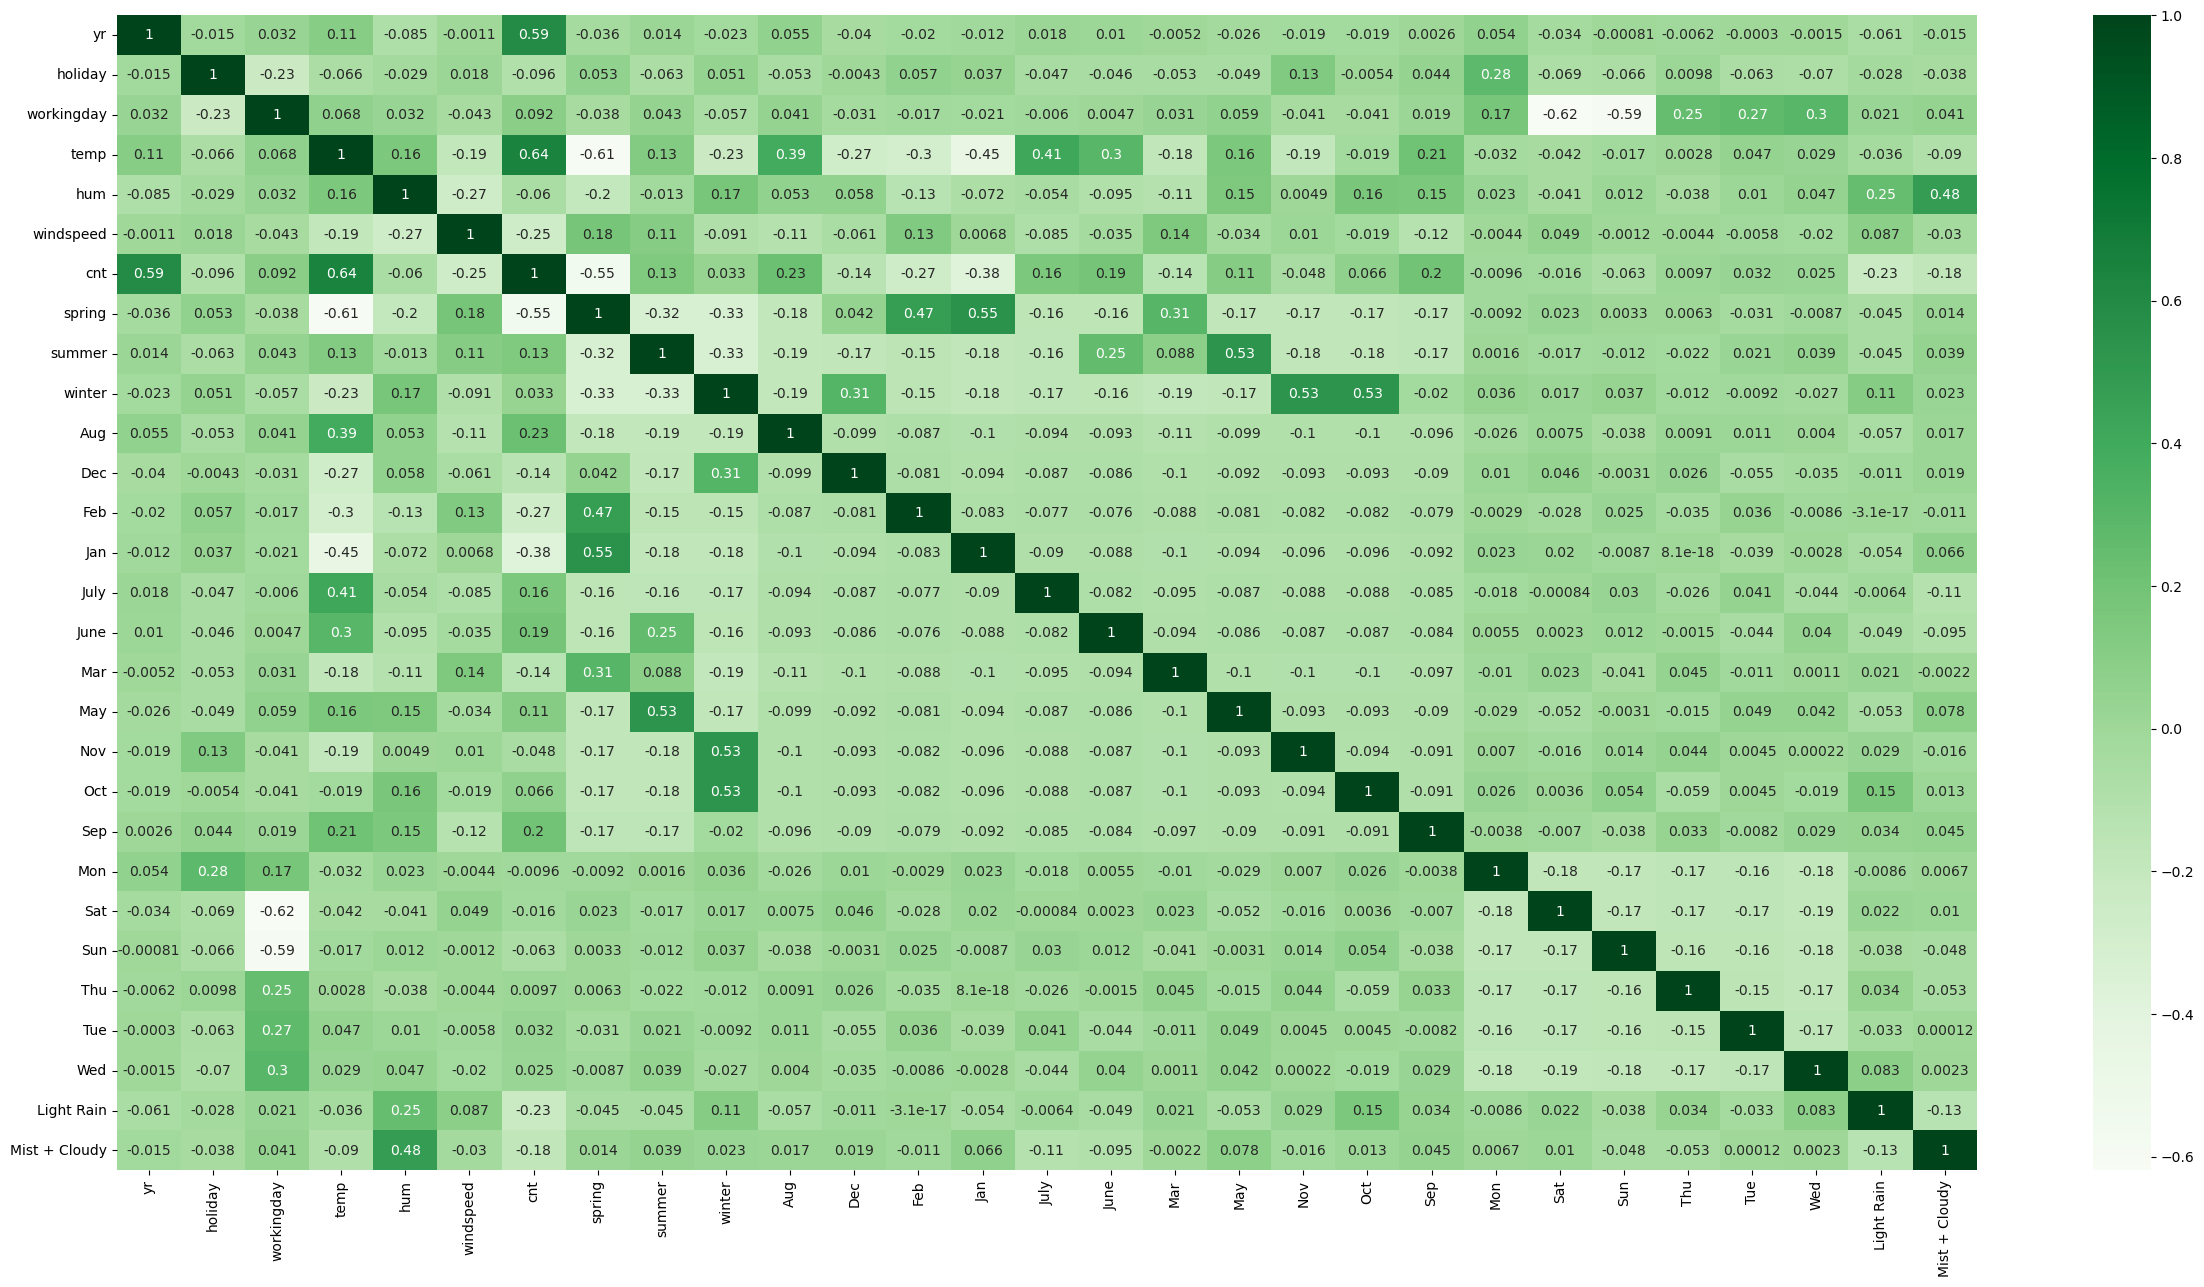

In [555]:
# we have created many dummmy variables and normalized the data also, lets find the correlation between all the fields now using heat map.
plt.figure(figsize=(30,15))
sns.heatmap(data=df_train.corr(),annot=True,cmap='Greens')
plt.show()

#### *Inference*
- cnt has highest corelation with temp, also We can see few more positive corelations, lets proceed to model creation.

### 4.2 > Dividing into X and Y sets for the model building

In [558]:
y_train = df_train.pop('cnt')
X_train = df_train

In [559]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [560]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Step 5: Linear model building

### 5.1> Start with statsmodel

In [563]:
#import library
import statsmodels.api as sm

-----------
### Model-1 : lr_model_1 
    * with 1 variable 'temp'

In [565]:
# Add a constant which is also known as intercept
X_train_sm_1 = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr_model_1 = sm.OLS(y_train, X_train_sm_1).fit()

#print parameters
lr_model_1.params

const    0.169798
temp     0.639952
dtype: float64

In [566]:
#let's check the summary of this model
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           5.80e-61
Time:                        23:23:11   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can observe that R-Squared value is 0.414, which means 41.4% of variance variance of cnt is explained.

Lets take 2nd highest corelated variable 'yr', we will see if R-Squared value can be improved

-----------
### Model-2 : lr_model_2
    * with 2 variables 'temp' and 'yr'

In [569]:
# Add a constant which is also known as intercept
X_train_sm_2 = sm.add_constant(X_train[['temp','yr']])

# Create a second fitted model
lr_model_2 = sm.OLS(y_train, X_train_sm_2).fit()

#print parameters
lr_model_2.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [570]:
#let's check the summary of this model
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          9.25e-130
Time:                        23:23:11   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can observe that R-Squared value is improved to 0.690, which means 69% of variance of cnt is explained.

Now let's go ahead and add all the feature variables to uderstand if the model can be improved or not.

----------
### Model-3 : lr_model_3
    * with all variables

In [573]:
#let's find all the column names
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [574]:
# Add a constant which is also known as intercept
X_train_sm_3 = sm.add_constant(X_train)

# Create third fitted model
lr_model_3 = sm.OLS(y_train, X_train_sm_3).fit()

#print parameters
lr_model_3.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
spring          -0.048159
summer           0.038725
winter           0.105847
Aug              0.014404
Dec             -0.045586
Feb             -0.032282
Jan             -0.062777
July            -0.040350
June            -0.002972
Mar              0.001045
May              0.023940
Nov             -0.041851
Oct              0.007534
Sep              0.081060
Mon             -0.020907
Sat              0.096389
Sun              0.041853
Thu             -0.009237
Tue             -0.018890
Wed             -0.005388
Light Rain      -0.257443
Mist + Cloudy   -0.061066
dtype: float64

In [575]:
#let's check the summary of this model
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          8.74e-182
Time:                        23:23:11   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring           -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer            0.0387      0.026      1.478      0.140      -0.013       0.090
winter            0.1058      0.028      3.794      0.000       0.051       0.161
Aug               0.0144      0.034      0.428      0.669      -0.052       0.081
Dec              -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb              -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan              -0.0628      0.034     -1.873      0.062      -0.129       0.003
July             -0.0404      0.035     -1.151      0.250      -0.109       0.029
June             -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar               0.0010      0.025      0.043      0.966      -0.047       0.049
May               0.0239      0.021      1.140      0.255      -0.017       0.065
Nov              -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct               0.0075      0.036      0.211      0.833      -0.063       0.078
Sep               0.0811      0.032      2.533      0.012       0.018       0.144
Mon              -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat               0.0964      0.014      7.029      0.000       0.069       0.123
Sun               0.0419      0.014      3.006      0.003       0.014       0.069
Thu              -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue              -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed              -0.0054      0.015     -0.362      0.718      -0.035       0.024
Light Rain       -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist + Cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.32e+16
================================================================

### We can observe that R-Squared value is improved to 0.853, which means 85.3% of variance of cnt is explained.

*  But we can also observe that there are many features having very high p value ( > 0.05). We can improve the model by excluding the variables with high p values.
*  Since there are too many features, lets use the RFE (recursive feature elimination) which is an automated approach to select the features.

### 5.2> Feature selection using RFE (recursive feature elimination)

In [578]:
# Importing libraries for RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [579]:
#Create the objects
lm = LinearRegression()
lm.fit(X_train, y_train)

# Lets take 12 features into consideration
rfe = RFE(lm, n_features_to_select=13)

#fit with our train dataset
rfe = rfe.fit(X_train, y_train)

# Let's find which features are seleted and which are rejected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 15),
 ('Mar', False, 16),
 ('May', False, 7),
 ('Nov', False, 4),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 10),
 ('Sat', True, 1),
 ('Sun', False, 9),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 14),
 ('Light Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [580]:
#store the columns which are true into a variable
RFE_cols = X_train.columns[rfe.support_]

#Print these features(which are True)
RFE_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'July', 'Sep', 'Sat', 'Light Rain', 'Mist + Cloudy'],
      dtype='object')

### Lets build model using the features we got from RFE
-----------------
### Model-4 RFE: lr_model_4
    * with all RFE variables


In [582]:
# Add a constant which is also known as intercept
X_train_sm_4 = sm.add_constant(X_train[RFE_cols])

# Create forth fitted model
lr_model_4 = sm.OLS(y_train, X_train_sm_4).fit()

#print parameters
lr_model_4.params

const            0.279640
yr               0.229791
holiday         -0.094469
temp             0.530609
hum             -0.168105
windspeed       -0.183143
spring          -0.056290
summer           0.052092
winter           0.098387
July            -0.057853
Sep              0.082751
Sat              0.017490
Light Rain      -0.239456
Mist + Cloudy   -0.054750
dtype: float64

In [583]:
#let's check the summary of this model
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          7.51e-190
Time:                        23:23:12   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2796      0.035      8.096      0.000       0.212       0.348
yr                0.2298      0.008     28.298      0.000       0.214       0.246
holiday          -0.0945      0.026     -3.690      0.000      -0.145      -0.044
temp              0.5306      0.034     15.779      0.000       0.465       0.597
hum              -0.1681      0.038     -4.450      0.000      -0.242      -0.094
windspeed        -0.1831      0.026     -7.120      0.000      -0.234      -0.133
spring           -0.0563      0.021     -2.701      0.007      -0.097      -0.015
summer            0.0521      0.015      3.472      0.001       0.023       0.082
winter            0.0984      0.017      5.706      0.000       0.065       0.132
July             -0.0579      0.018     -3.162      0.002      -0.094      -0.022
Sep               0.0828      0.017      4.952      0.000       0.050       0.116
Sat               0.0175      0.011      1.575      0.116      -0.004       0.039
Light Rain       -0.2395      0.026     -9.090      0.000      -0.291      -0.188
Mist + Cloudy    -0.0547      0.011     -5.211      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       63.307   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.410
Skew:                          -0.685   Prob(JB):                     1.45e-30
Kurtosis:                       5.143   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can observe that R-Squared value is 0.843, which means 84.3% of variance of cnt is explained.

*  ALso, there significant high ( > 0.05) p value for column 'Sat': 0.116 .
*  Let's drop column 'Sat' and build the model again

In [585]:
#drop column 'Sat' from the variable we have created from RFE
RFE_cols=RFE_cols.drop('Sat')

---------
### Model-5 RFE: lr_model_5
    * col 'Sat' is dropped

In [587]:
# Add a constant which is also known as intercept
X_train_sm_5 = sm.add_constant(X_train[RFE_cols])

# Create fifth fitted model
lr_model_5 = sm.OLS(y_train, X_train_sm_5).fit()

#print parameters
lr_model_5.params

const            0.284133
yr               0.229346
holiday         -0.097404
temp             0.530017
hum             -0.171023
windspeed       -0.181924
spring          -0.056249
summer           0.051942
winter           0.098745
July            -0.057536
Sep              0.083036
Light Rain      -0.238245
Mist + Cloudy   -0.054175
dtype: float64

In [588]:
#let's check the summary of this model
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.69e-190
Time:                        23:23:12   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2841      0.034      8.242      0.000       0.216       0.352
yr                0.2293      0.008     28.219      0.000       0.213       0.245
holiday          -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp              0.5300      0.034     15.739      0.000       0.464       0.596
hum              -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed        -0.1819      0.026     -7.066      0.000      -0.233      -0.131
spring           -0.0562      0.021     -2.695      0.007      -0.097      -0.015
summer            0.0519      0.015      3.457      0.001       0.022       0.081
winter            0.0987      0.017      5.719      0.000       0.065       0.133
July             -0.0575      0.018     -3.140      0.002      -0.094      -0.022
Sep               0.0830      0.017      4.962      0.000       0.050       0.116
Light Rain       -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Mist + Cloudy    -0.0542      0.011     -5.151      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can observe that R-Squared value is 0.842, which means 84.2% of variance of cnt is explained.

*  ALso, there is no significant high p value( > 0.05).
*  Lets find the VIF( Variance Inflation Factor), which is a measure used to detect the presence of multicollinearity.

### 5.3> Check presence of multicollinearity using VIF( Variance Inflation Factor)

In [591]:
# Import the VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [592]:
# find the VIF values for selected features
vif = pd.DataFrame()
X = X_train[RFE_cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,Mist + Cloudy,2.28
0,yr,2.08
8,July,1.58
9,Sep,1.38


### We can observe that column 'hum' has highest VIF and (VIF > 5) is not good for the model

*  we are going to drop the 'hum' column and build the model aagain.

* Observation -  we should not drop other columns with high VIF at the same time. we should follow the process one by one.

In [594]:
#drop column 'hum' from the variable we have created from RFE
RFE_cols=RFE_cols.drop('hum')

-----------
### Model-6 RFE : lr_model_6
    * col 'hum' is dropped

In [596]:
# Add a constant which is also known as intercept
X_train_sm_6 = sm.add_constant(X_train[RFE_cols])

# Create sixth fitted model
lr_model_6 = sm.OLS(y_train, X_train_sm_6).fit()

#print parameters
lr_model_6.params

const            0.199648
yr               0.233482
holiday         -0.098013
temp             0.491508
windspeed       -0.147977
spring          -0.066942
summer           0.045280
winter           0.083084
July            -0.052418
Sep              0.076686
Light Rain      -0.285155
Mist + Cloudy   -0.081558
dtype: float64

In [597]:
#let's check the summary of this model
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.40e-187
Time:                        23:23:12   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758      0.000       0.142       0.258
yr                0.2335      0.008     28.361      0.000       0.217       0.250
holiday          -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp              0.4915      0.033     14.798      0.000       0.426       0.557
windspeed        -0.1480      0.025     -5.893      0.000      -0.197      -0.099
spring           -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer            0.0453      0.015      2.971      0.003       0.015       0.075
winter            0.0831      0.017      4.818      0.000       0.049       0.117
July             -0.0524      0.019     -2.811      0.005      -0.089      -0.016
Sep               0.0767      0.017      4.511      0.000       0.043       0.110
Light Rain       -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist + Cloudy    -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [598]:
# There is no increase in p value, lets check the VIF again

# finding the VIF values for selected features
vif = pd.DataFrame()
X = X_train[RFE_cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,July,1.58
10,Mist + Cloudy,1.55
8,Sep,1.34
9,Light Rain,1.08


### We can observe that column 'temp' has highest VIF and (VIF > 5) is not good for the model. But we also know that temp has a good positive corelation with cnt.

*  Let's plot heatmap again, so that we can find if some other variable has good corelation with temp to avoid multicollinearity


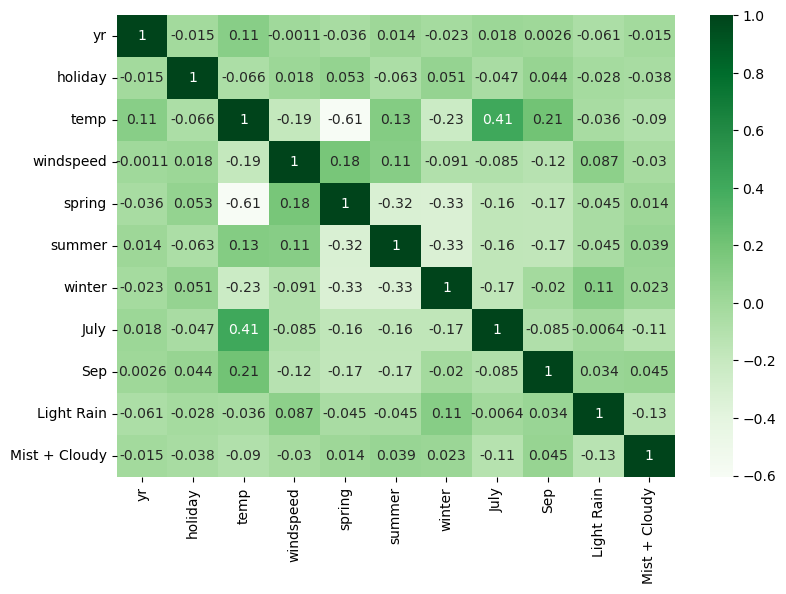

In [600]:
plt.figure(figsize=(9,6))
sns.heatmap(data=X_train[RFE_cols].corr() ,annot=True,cmap='Greens')
plt.show()

### From above heatmap we can observe that column 'temp' has good corelation with 'July' (0.41). Also from the last model we have seen that July has higher p value as compared to temp. 

*  If p value is high and VIF is low --Drop First
*  If p value is low and VIF is high --Drop Later

* Let's drop the feature 'July'

In [602]:
#drop column 'july' from the variable we have created from RFE
RFE_cols=RFE_cols.drop('July')

-----------
### Model-7 RFE : lr_model_7
    * col 'July' is dropped

In [604]:
# Add a constant which is also known as intercept
X_train_sm_7 = sm.add_constant(X_train[RFE_cols])

# Create seventh fitted model
lr_model_7 = sm.OLS(y_train, X_train_sm_7).fit()

#print parameters
lr_model_7.params

const            0.190994
yr               0.234060
holiday         -0.096865
temp             0.478177
windspeed       -0.148155
spring          -0.055092
summer           0.060987
winter           0.095929
Sep              0.090932
Light Rain      -0.286002
Mist + Cloudy   -0.080124
dtype: float64

In [605]:
#let's check the summary of this model
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          7.36e-187
Time:                        23:23:14   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1910      0.030      6.456      0.000       0.133       0.249
yr                0.2341      0.008     28.246      0.000       0.218       0.250
holiday          -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp              0.4782      0.033     14.446      0.000       0.413       0.543
windspeed        -0.1482      0.025     -5.860      0.000      -0.198      -0.098
spring           -0.0551      0.021     -2.641      0.009      -0.096      -0.014
summer            0.0610      0.014      4.271      0.000       0.033       0.089
winter            0.0959      0.017      5.730      0.000       0.063       0.129
Sep               0.0909      0.016      5.565      0.000       0.059       0.123
Light Rain       -0.2860      0.025    -11.492      0.000      -0.335      -0.237
Mist + Cloudy    -0.0801      0.009     -9.090      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [606]:
# There is no increase in p value, lets check the VIF again

# finding the VIF values for selected features
vif = pd.DataFrame()
X = X_train[RFE_cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
9,Mist + Cloudy,1.54
7,Sep,1.23
8,Light Rain,1.08
1,holiday,1.04


### Lets consider this model is final as all the features have VIF < 5, p value < 0.05 and R-Squared captured as 0.833 which can explain the variance of cnt by 83.3% 

# Step 6: Residual analysis

In [609]:
#Find y_train_pred for residual analysis using the latest model lr_model_7
y_train_pred = lr_model_7.predict(X_train_sm_7)

## Let's verify the 3 main assumptions

### 6.1> Distribution of the error terms
We need to check if the error terms are also normally distributed (which is one of the major assumptions of linear regression), 
let us plot the histogram of the error terms and see what it looks like.

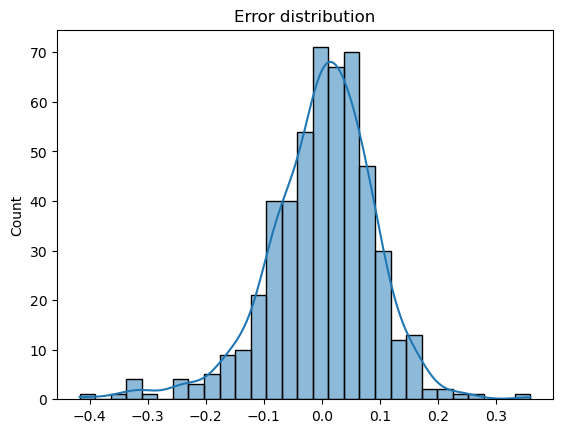

In [611]:
#save the error which finding the difference between actual y value and model predicted y value
res = y_train - y_train_pred
#plot the error distribution, it should be centered around 0 and should be a normal distribution
sns.histplot(res,kde=True)
plt.title('Error distribution')
plt.show()



#### *Inference*
- The residuals are the normally distributed with a mean 0. Assumption is satisfied
-------------

### 6.2> Looking for patterns in the residuals
**Independence Assumption:** The residuals are independent of each other.There should be no correlation between them.

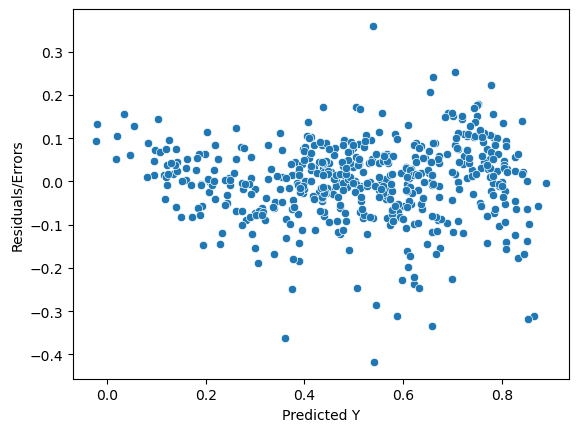

In [614]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('Predicted Y')
plt.ylabel('Residuals/Errors')
plt.show()

#### *Inference*
- The residuals have no relations with each other
-------------

### 6.3> Looking for Linearity
**Linearity Assumption:** The relationship between the independent variables (predictors) and the dependent variable (response) is linear.


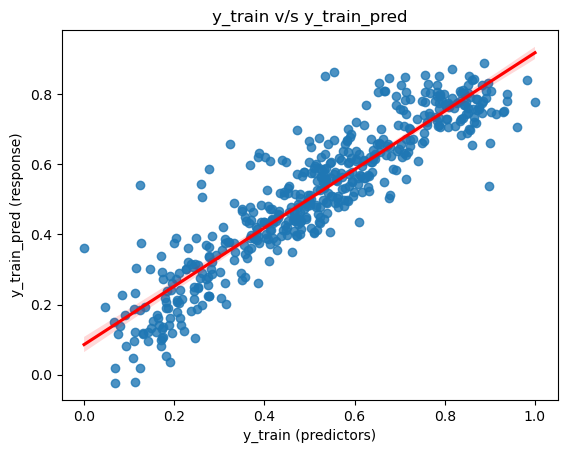

In [617]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' })
# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train (predictors)')
plt.ylabel('y_train_pred (response)') 
plt.show()

#### *Inference*
- We can see the linear relationship between independent variables (predictors) and the dependent variable (response)
-------------

## Step 8: Predictions using the Final Model : lr_model_7

Let's make predictions using the final, i.e. seventh model.

### 8.1> Applying the scaling on the test sets

Note: we fit() and transform() Train dataset but for Test dataset we only do transform().


In [621]:
#checking the variables to be standardized (already data is stored in a list during scaling of training data set)
vars_to_scale

['temp', 'hum', 'windspeed', 'cnt']

In [622]:
#perform scaling on test data set
df_test[vars_to_scale] = scaler.transform(df_test[vars_to_scale])


In [623]:
#let's check the test data using describe
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8.2 > Dividing into X_test and y_test

same method that we performed for train dataset

In [625]:
y_test = df_test.pop('cnt')
X_test = df_test

In [626]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [627]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [628]:
# Let's check the names of final feature selected.

RFE_cols

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Sep', 'Light Rain', 'Mist + Cloudy'],
      dtype='object')

In [629]:
# Add a constant which is also known as intercept
X_test_sm = sm.add_constant(X_test[RFE_cols])


In [630]:
#making predictions using the latest model lr_model_7
y_test_pred = lr_model_7.predict(X_test_sm)


### Now we have both y_test and y_test_pred

# Step 9: Model Evaluation
* Let's calculate R_Square and Adjusted R_square scores for both train and test data sets
* After we will plot the graph for actual versus predicted values.

In [633]:
#Import the libraries to calculate r2 score
from sklearn.metrics import r2_score


### 9.1> R2 score calculation

In [635]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train = round(r2_train, 3)
r2_train

0.833

In [636]:
#r2 score of the test set

r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test = round(r2_test, 3)
r2_test


0.804

### 9.2> Adjusted R2 score calculation

Adjusted_R2 = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

In [638]:
n = len(y_test)    #number of observations
k = len(RFE_cols)  # Number of features considered in final model
#R2 score is already stored in varianle r2_test in above step
adj_r_squared = round( 1 - ((1 - r2_test) * (n - 1) / (n - k - 1)) ,3)
print(f'Adjusted R-squared for test set: {adj_r_squared}')

Adjusted R-squared for test set: 0.795


#### *Inference*
- We can see that the r_squared on the test set is **0.804** and the r-squared on the trained set **0.833** which is close to each other
- Adjusted R-squared for test set: **0.795**
- Both values show strong model performance, capturing a significant portion of the variance.


In [640]:
# We can also calculate mean squared error and root mean squared error of the test set

from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_test_pred)
print(mse_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_test = np.sqrt(mse_test)
print(rmse_test)

0.00933083016626527
0.09659622231881157


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance.

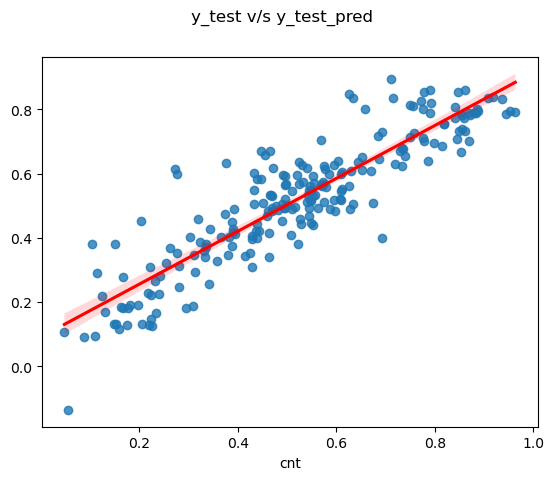

In [642]:
#Let's visualize the predicted model using a scatter plot with a linear regression fit line
fig = plt.figure()
fig.suptitle('y_test v/s y_test_pred') 
plt.xlabel('y_test (predictors)')
plt.ylabel('y_test_pred (response)')  
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' })
plt.show()

# Linear Regression Equation
Lets Find Equation of the line which can be derived from the various coffecients derived from the model

In [644]:
# Coefficients from the final model
round(lr_model_7.params, 2)

const            0.19
yr               0.23
holiday         -0.10
temp             0.48
windspeed       -0.15
spring          -0.06
summer           0.06
winter           0.10
Sep              0.09
Light Rain      -0.29
Mist + Cloudy   -0.08
dtype: float64

By using the above coffecients, the equation of our best fitted line is (coefficients arranged in descending order):

***cnt = 0.48 x temp + 0.23 x yr + 0.10 x winter + 0.09 x Sep + 0.06 x summer - 0.06 x spring - 0.08 x Mist  +  Cloudy - 0.10 x holiday - 0.15 x windspeed - 0.29 x Light Rain + 0.19***

---------------

### Conclusion
our linear regression model (lr_model_7) demonstrates strong predictive power with an R-squared score of 0.804 on the test set, indicating that approximately 80.4% of the variance in bike rentals (cnt) can be explained by the selected features. The adjusted R-squared score of 0.795 confirms that the model remains robust even after adjusting for the number of predictors.

### Summary
The linear equation derived from your model is as follows: <br>
cnt = 0.48 x temp + 0.23 x yr + 0.10 x winter + 0.09 x Sep + 0.06 x summer - 0.06 x spring - 0.08 x Mist  +  Cloudy - 0.10 x holiday - 0.15 x windspeed - 0.29 x Light Rain + 0.19




### Key Insights:

- Temperature (temp) has the highest positive impact on bike rentals, suggesting that warmer weather encourages more bike usage.
- Year (yr) also shows a positive trend, indicating increasing bike rentals over the years.
- Winter and September (Sep) have positive coefficients, suggesting higher bike usage during these periods.
- Light Rain and Windspeed have negative impacts, indicating that adverse weather conditions reduce bike rentals.
- Holidays have a slight negative impact on bike rentals, possibly due to reduced commuting needs.
- Seasonal Effects: Summer has a positive impact, while Spring has a slight negative impact on bike rentals.

### Recommendations
- Promote bike rentals during warm weather with discounts and promotions.
- Develop strategies to mitigate the impact of rain and high wind speeds.
- Try to promote winter biking with incentives.
- Create marketing strategies based on seasonal trends.
- Invest in expanding bike-sharing infrastructure to meet increasing demand.
- Create special offers and events during high-demand periods like September.
